<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/RNN/blob/main/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Input,Dropout


In [2]:
dataset = tfds.load('imdb_reviews',as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OXU4L3_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OXU4L3_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OXU4L3_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train,test = dataset['train'],dataset['test']

In [4]:
batch_size = 32

train_dataset = train.shuffle(10000)
train_dataset = train.batch(batch_size)
test_dataset = test.batch(batch_size)

In [5]:
example,label = next(iter(train_dataset))
example,label

(<tf.Tensor: shape=(32,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fe

In [6]:
from tensorflow.keras.layers import TextVectorization

In [7]:
encoder = TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text,_ : text))

vocabulary = np.array(encoder.get_vocabulary())

In [8]:
original_text = example.numpy()[0]
encoded_text = encoder(original_text).numpy()
decoded_text = " ".join(vocabulary[encoded_text])

original_text,encoded_text,decoded_text

(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 array([  11,   14,   34,  412,  384,   18,   90,   28,    1,    8,   33,
        1322, 3560,   42,  487,    1,  191,   24,   85,  152,   19,   11,
         217,  316,   28,   65,  240,  214,    8,  489,   54,   65,   85,
         112,   96,   22, 5596,   11,   93,  642,  743,   11,  

In [16]:
model = Sequential([
    encoder,
    Embedding(input_dim=len(vocabulary),output_dim=100,mask_zero=True),
    Bidirectional(LSTM(100,return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dense(1)
])


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# model.summary()

In [18]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 130ms/step - accuracy: 0.7064 - loss: 0.6322 - val_accuracy: 0.7745 - val_loss: 0.4868
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.8361 - loss: 0.4408 - val_accuracy: 0.7374 - val_loss: 0.5398
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7855 - loss: 0.6596 - val_accuracy: 0.6851 - val_loss: 3.1522
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.7205 - loss: 3.0360 - val_accuracy: 0.6966 - val_loss: 0.5734
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.7985 - loss: 0.4646 - val_accuracy: 0.7642 - val_loss: 0.5558
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.8601 - loss: 0.4203 - val_accuracy: 0.8393 - val_loss: 0.4834
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.8640 - loss: 0.3922 - val_accuracy: 0.6413 - val_loss: 0.6130
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.8802 - l

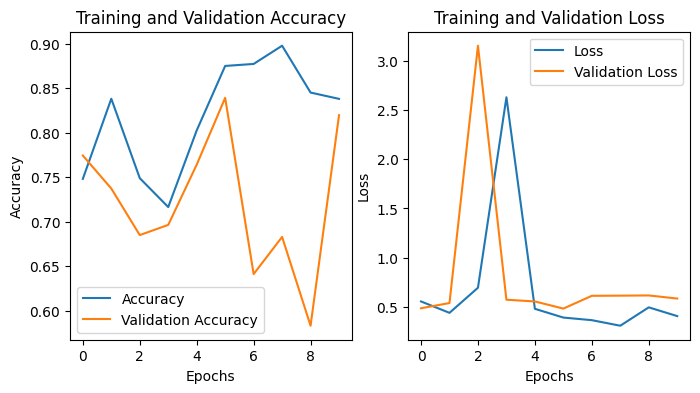

In [19]:
# Plotting the accuracy and loss over time

# Training history
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()
